**Practical Application Assignment 17.1: Comparing Classifiers**

# Carga de datos:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import ipywidgets as widgets
from io import StringIO
from IPython.display import display

# Widget para cargar archivos CSV
file_upload = widgets.FileUpload(accept='.csv', multiple=False)
display(file_upload)

# Función para cargar y procesar los datos bancarios
def load_bank_data(change):
    if file_upload.value:
        content = file_upload.value[next(iter(file_upload.value))]['content']
        data = pd.read_csv(StringIO(content.decode('utf-8')), sep=';')

        # Mostrar primeras filas del dataset
        print("Datos cargados:")
        print(data.head())

        # Preprocesar datos categóricos (crear variables dummy para las columnas categóricas)
        categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
        data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

        # Convertir la columna 'y' a valores numéricos
        data_encoded['y'] = data_encoded['y'].map({'no': 0, 'yes': 1})

        # Dividir los datos en X (características) e y (etiqueta)
        X = data_encoded.drop(columns='y')
        y = data_encoded['y']

        # Dividir los datos en conjunto de entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Escalar las características
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Definir modelos a evaluar
        models = {
            'Logistic Regression': LogisticRegression(max_iter=2000, solver='liblinear'),
            'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
            'KNN': KNeighborsClassifier(),
            'SVM': SVC(class_weight='balanced')
        }

        # Entrenar y evaluar los modelos
        print("\nResultados para la predicción de suscripción a depósito a plazo:")
        for name, model in models.items():
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
            print(classification_report(y_test, y_pred))

# Vincular la función de carga con el widget
file_upload.observe(load_bank_data, names='value')

FileUpload(value={}, accept='.csv', description='Upload')

Datos cargados:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribo

# Exploración inicial:

FileUpload(value={}, accept='.csv', description='Upload')

Primeras 5 filas del dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.co

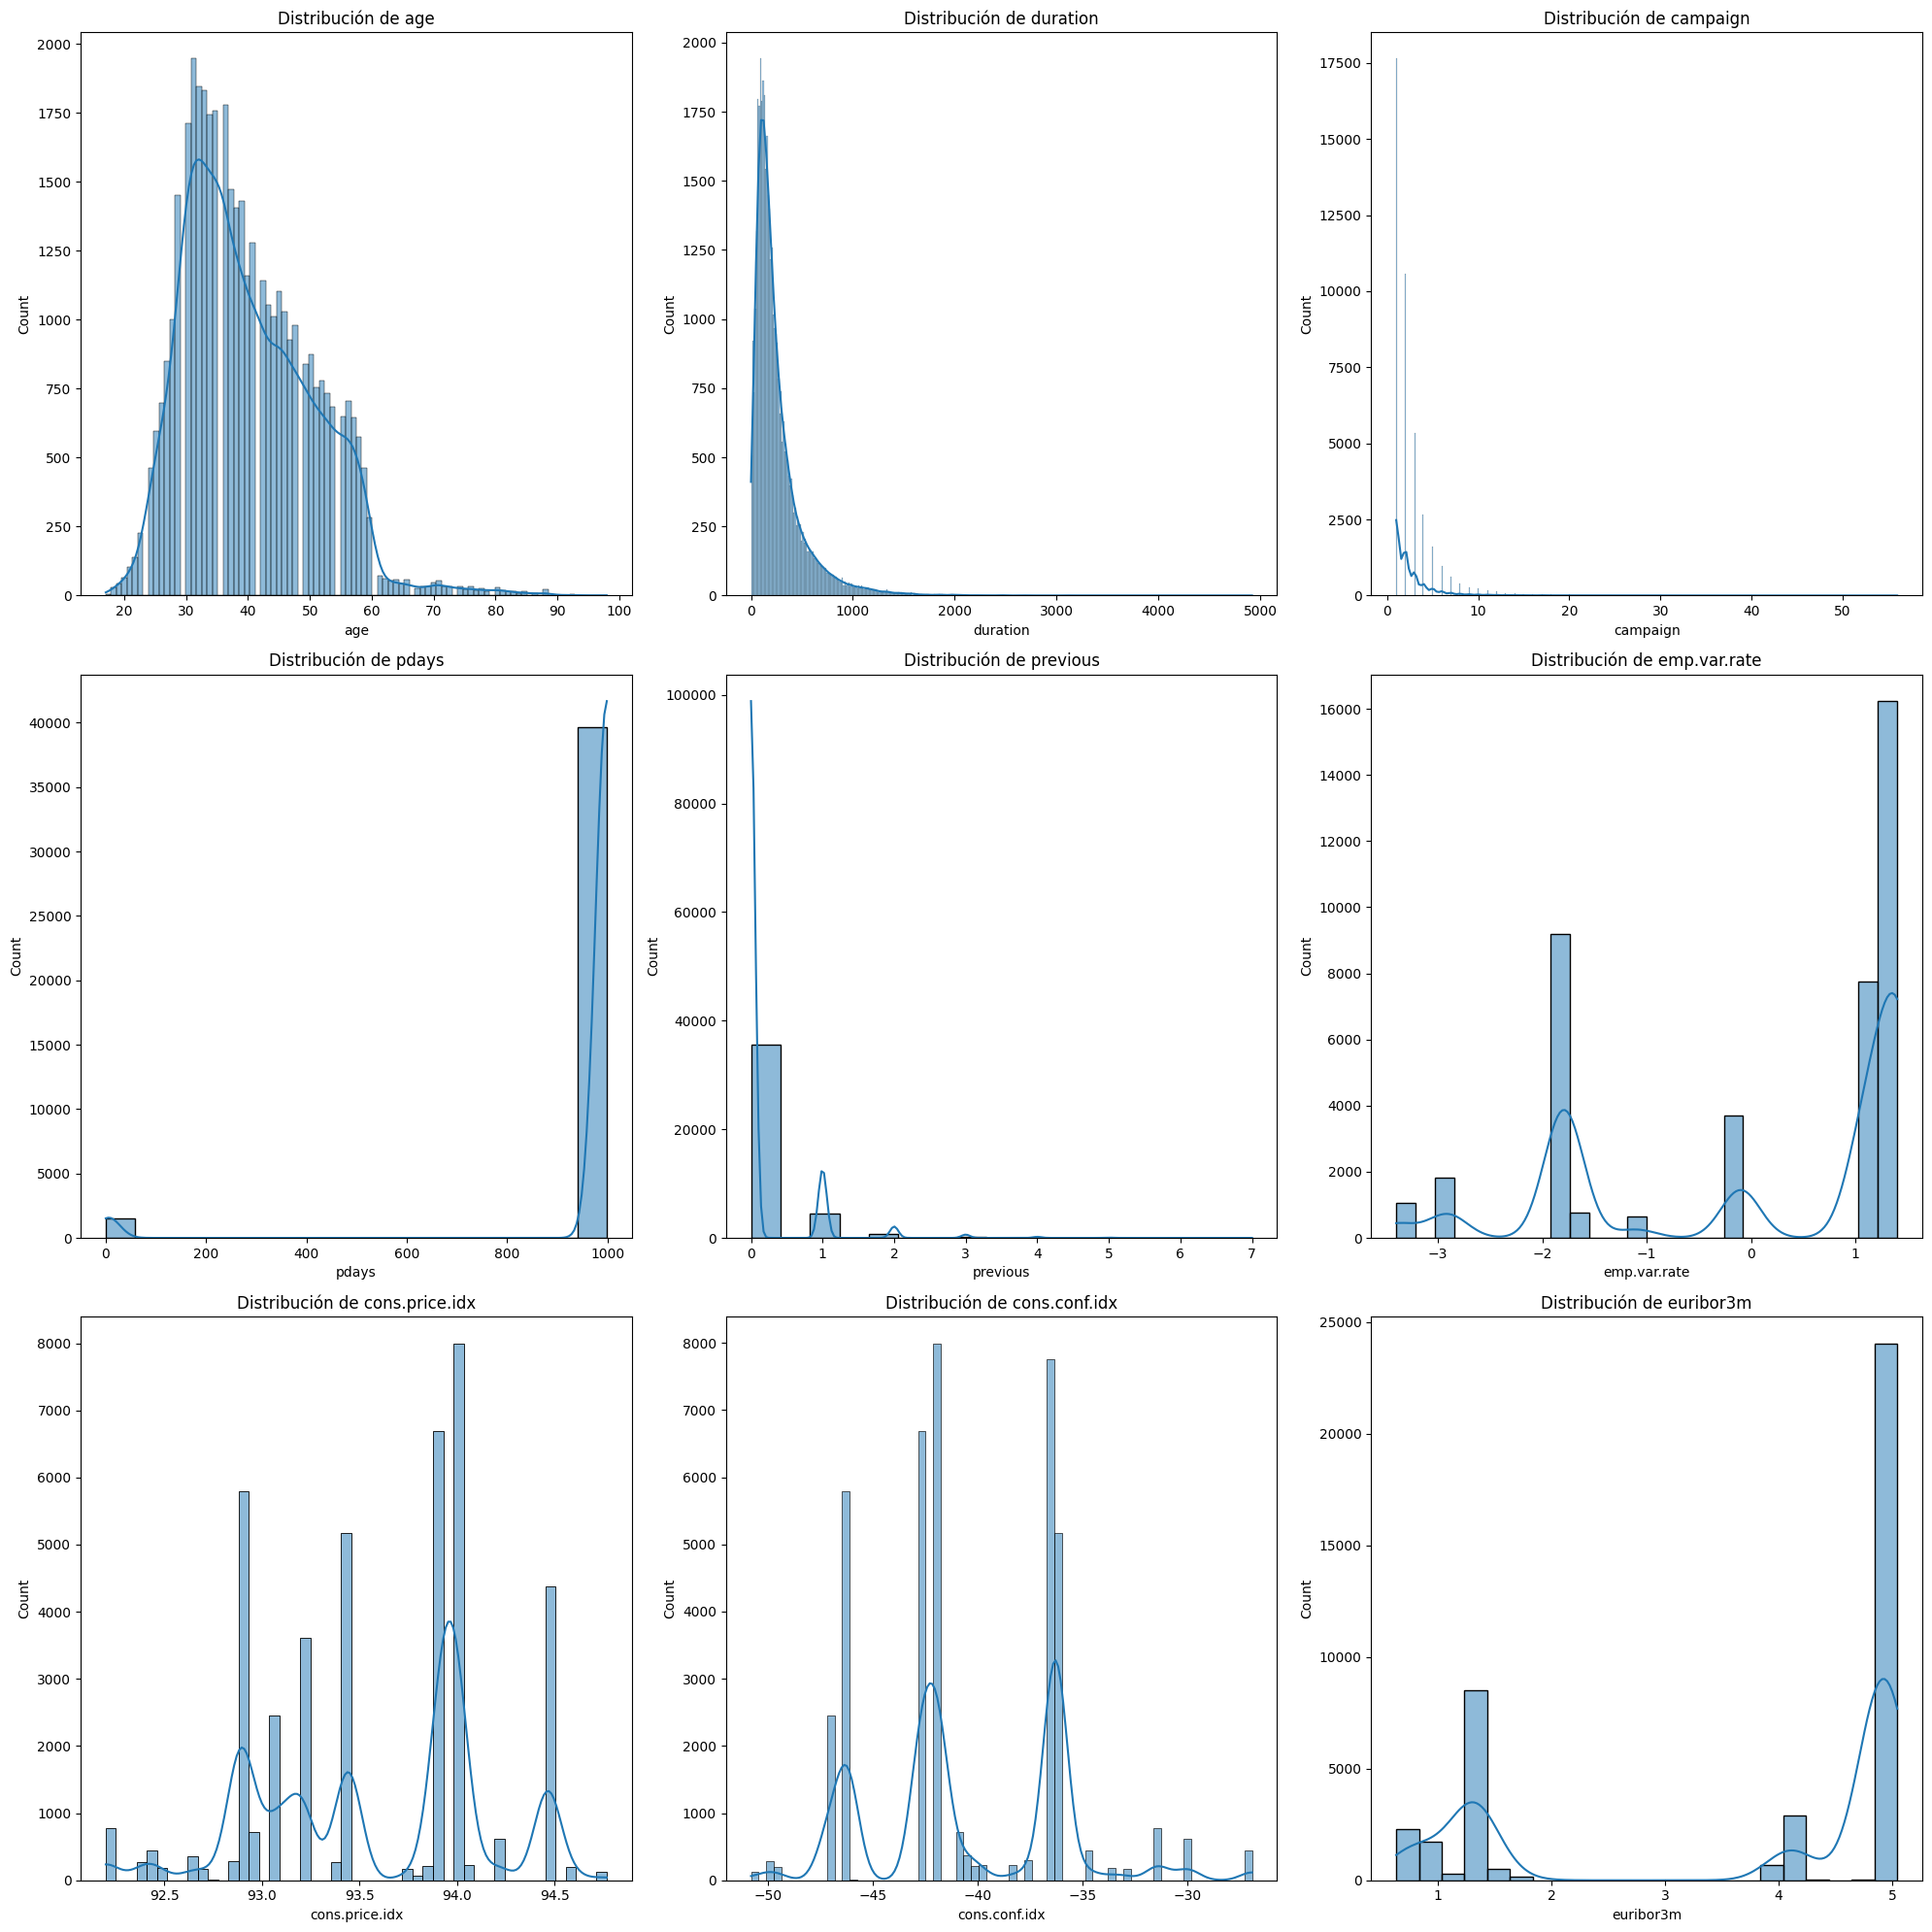

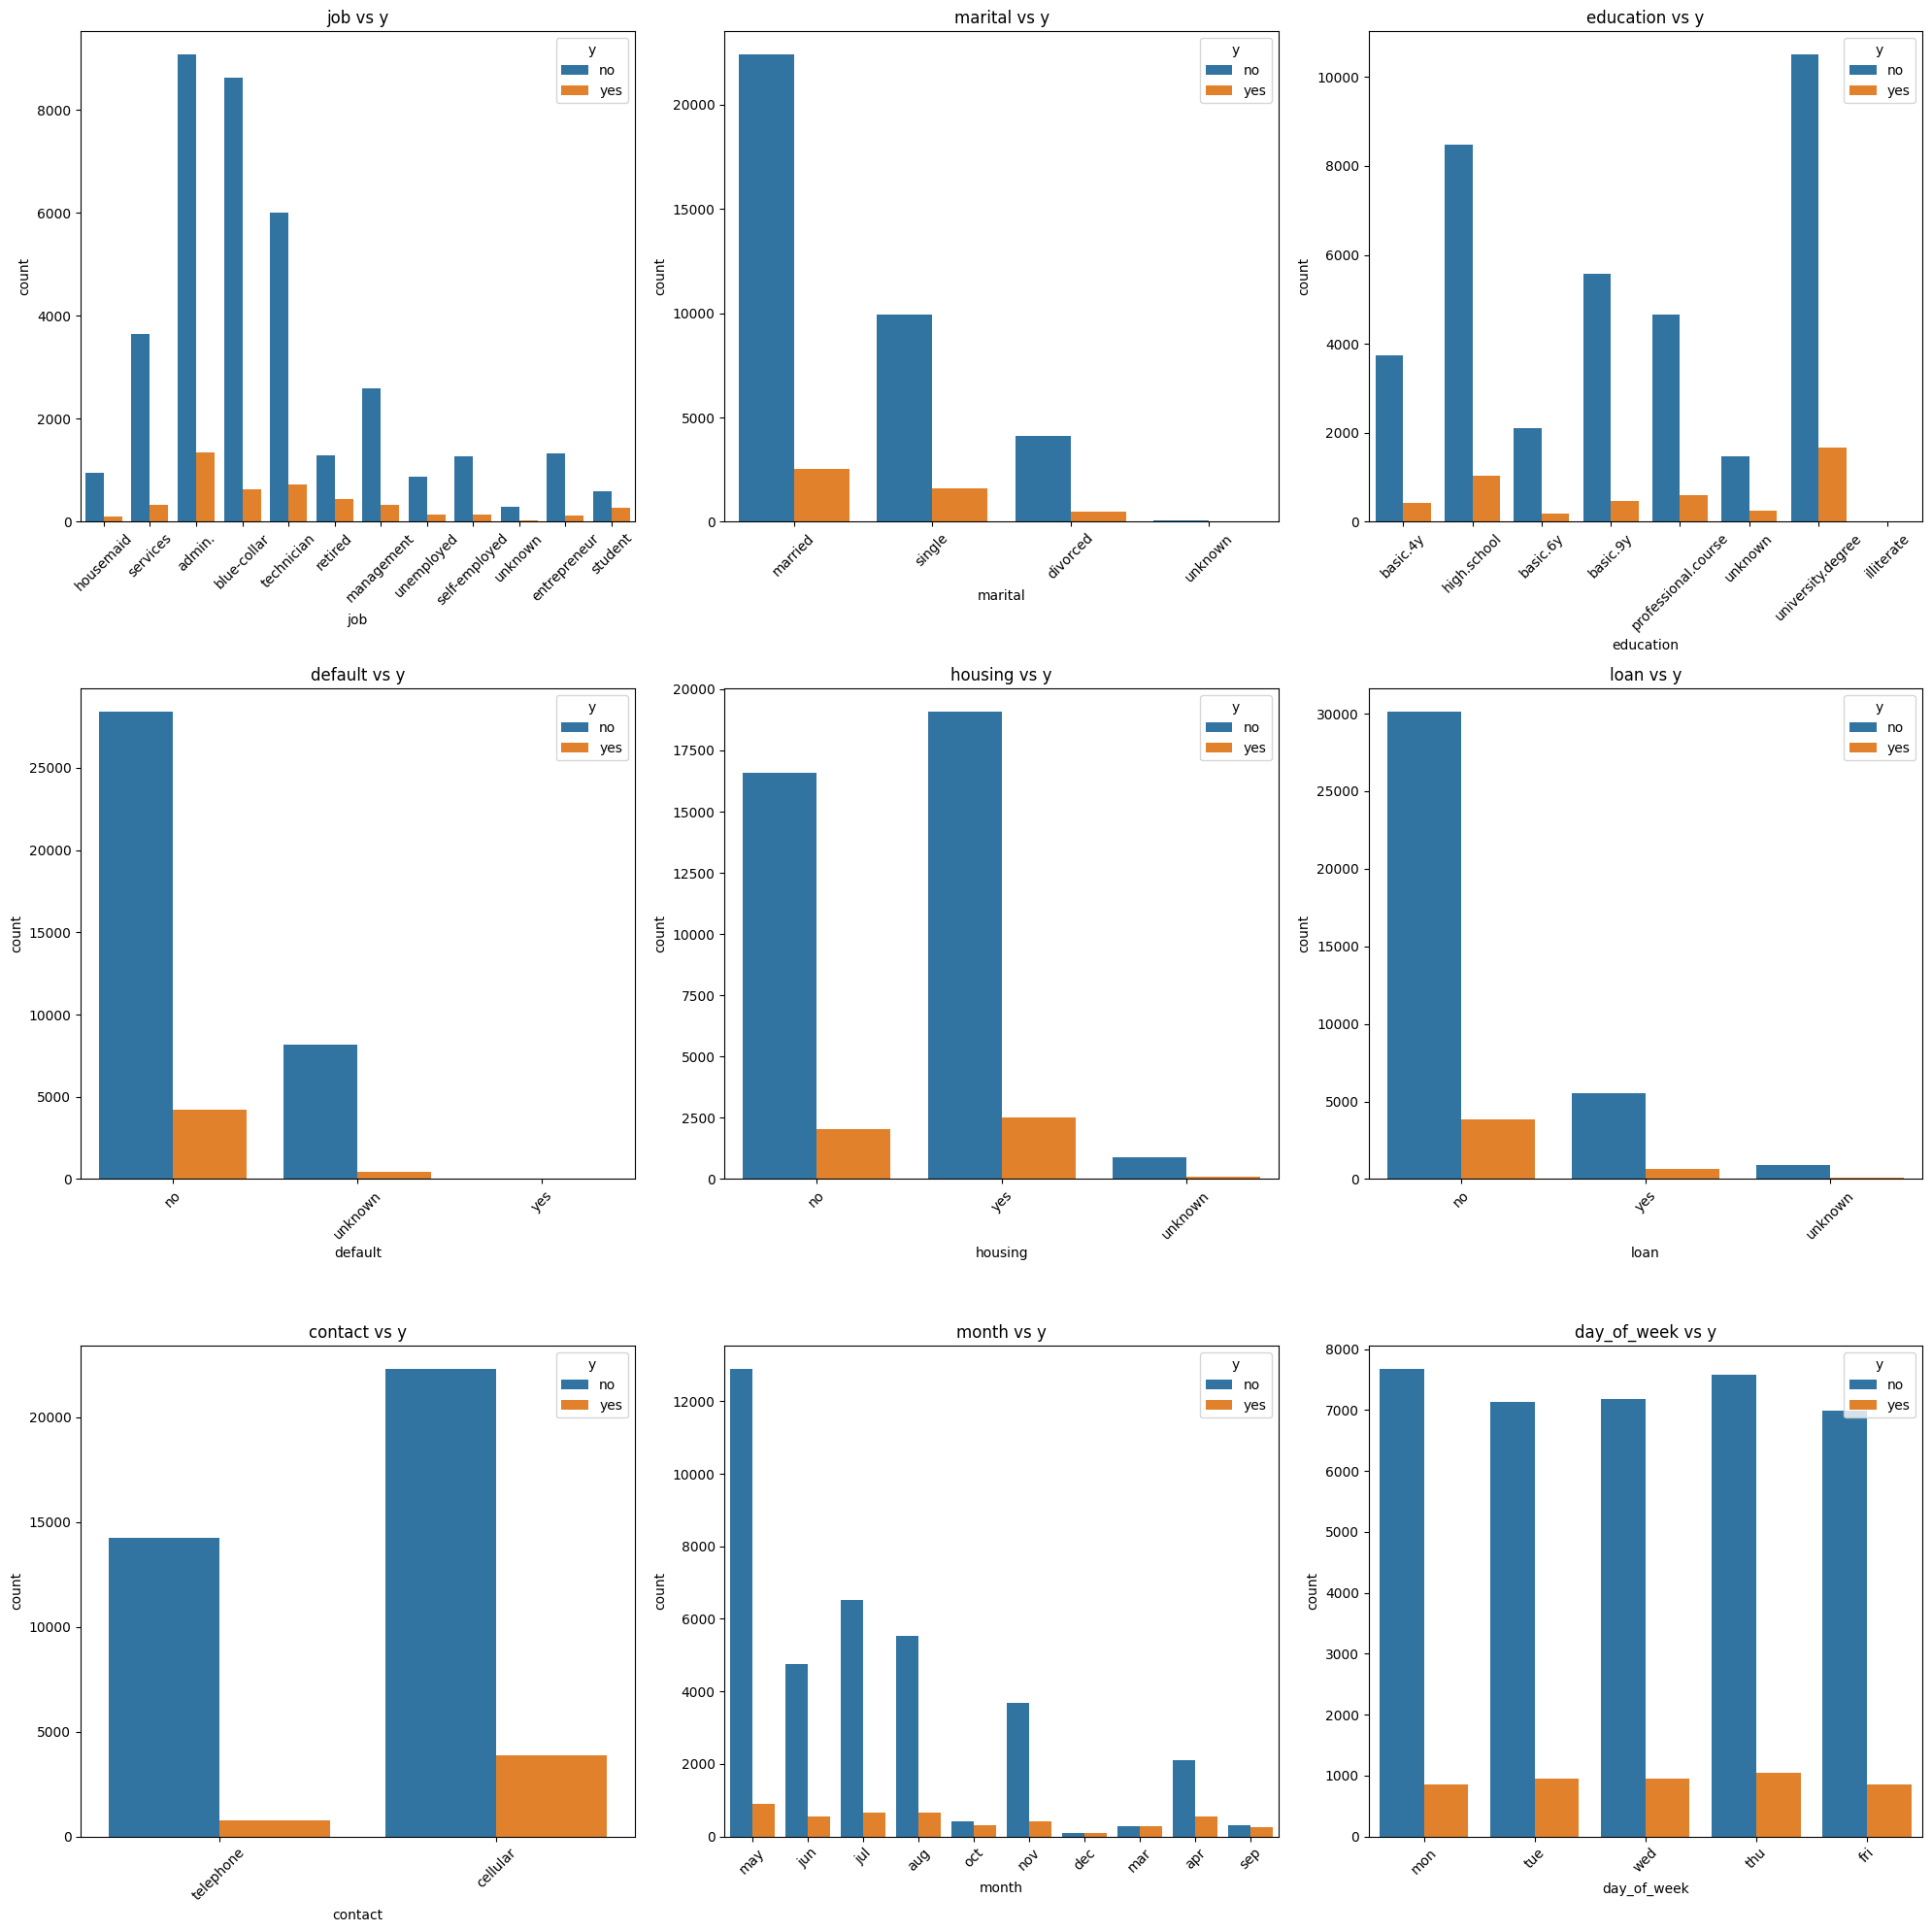

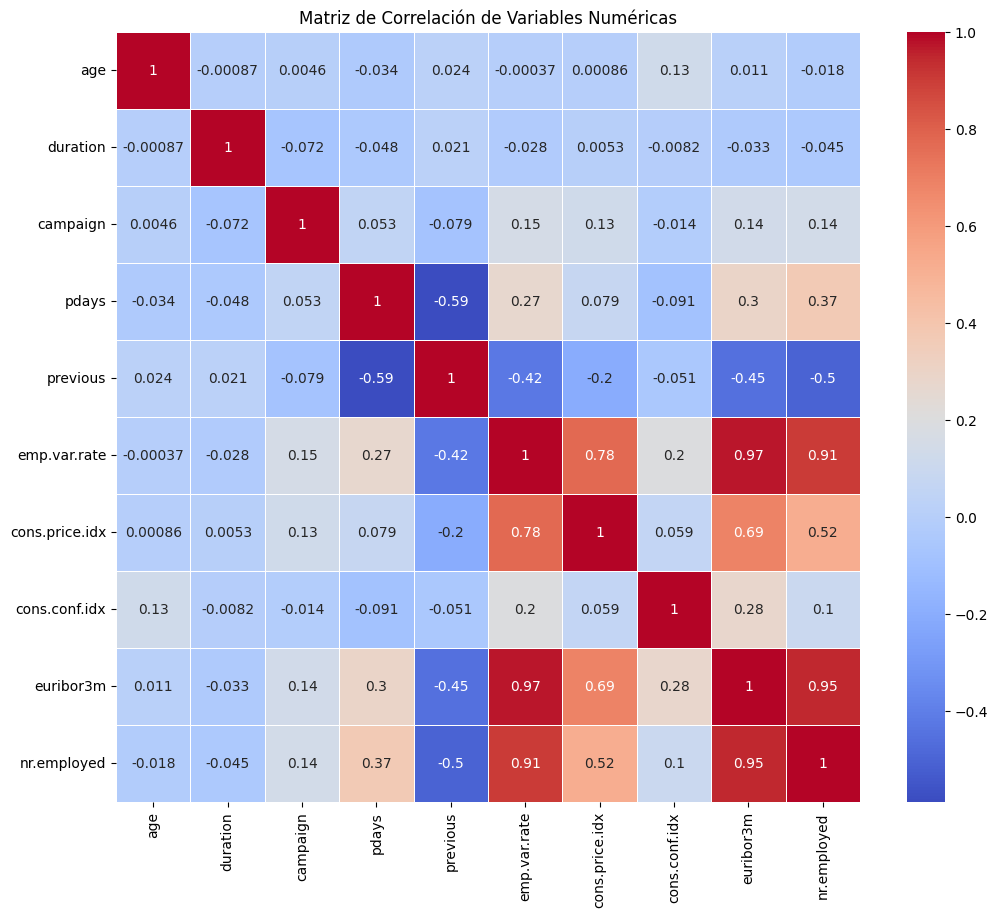

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from io import StringIO
from IPython.display import display

# Widget para cargar archivos CSV
file_upload = widgets.FileUpload(accept='.csv', multiple=False)
display(file_upload)

# Función para cargar y explorar los datos bancarios
def explore_bank_data(change):
    if file_upload.value:
        content = file_upload.value[next(iter(file_upload.value))]['content']
        data = pd.read_csv(StringIO(content.decode('utf-8')), sep=';')

        # 1. Examinar las primeras filas
        print("Primeras 5 filas del dataset:")
        print(data.head())
        print("\n" + "="*80 + "\n")

        # 2. Obtener información sobre las columnas
        print("Información sobre las columnas:")
        data.info()
        print("\n" + "="*80 + "\n")

        # 3. Resumen estadístico
        print("Resumen estadístico de las variables numéricas:")
        print(data.describe())
        print("\n" + "="*80 + "\n")

        # 4. Distribución de la variable objetivo
        print("Distribución de la variable objetivo 'y':")
        print(data['y'].value_counts(normalize=True))
        print("\n" + "="*80 + "\n")

        # 5. Verificar valores faltantes
        print("Valores faltantes por columna:")
        print(data.isnull().sum())
        print("\n" + "="*80 + "\n")

        # 6. Resumen de variables categóricas
        categorical_cols = data.select_dtypes(include=['object']).columns
        for col in categorical_cols:
            print(f"Distribución de {col}:")
            print(data[col].value_counts(normalize=True))
            print()

        # 7. Visualizaciones

        # Distribución de variables numéricas
        numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
        fig, axes = plt.subplots(3, 3, figsize=(20, 20))
        for i, col in enumerate(numeric_cols):
            if i < 9:  # Limitamos a 9 gráficos para que quepan en 3x3
                sns.histplot(data[col], ax=axes[i//3, i%3], kde=True)
                axes[i//3, i%3].set_title(f'Distribución de {col}')
        plt.tight_layout()
        plt.show()

        # Relación entre variables categóricas y la variable objetivo
        fig, axes = plt.subplots(3, 3, figsize=(20, 20))
        for i, col in enumerate(categorical_cols):
            if i < 9:  # Limitamos a 9 gráficos
                sns.countplot(x=col, hue='y', data=data, ax=axes[i//3, i%3])
                axes[i//3, i%3].set_title(f'{col} vs y')
                axes[i//3, i%3].tick_params(axis='x', rotation=45)
        plt.tight_layout()
        plt.show()

        # Matriz de correlación para variables numéricas
        plt.figure(figsize=(12, 10))
        sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title('Matriz de Correlación de Variables Numéricas')
        plt.show()

# Vincular la función de exploración con el widget
file_upload.observe(explore_bank_data, names='value')

# Preprocesamiento:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import ipywidgets as widgets
from io import StringIO
from IPython.display import display

# Widget para cargar archivos CSV
file_upload = widgets.FileUpload(accept='.csv', multiple=False)
display(file_upload)

def preprocess_bank_data(change):
    if file_upload.value:
        content = file_upload.value[next(iter(file_upload.value))]['content']
        data = pd.read_csv(StringIO(content.decode('utf-8')), sep=';')

        print("Datos originales:")
        print(data.head())
        print(f"Shape original: {data.shape}")
        print("\n" + "="*80 + "\n")

        # 1. Manejo de valores faltantes
        print("Valores faltantes antes del preprocesamiento:")
        print(data.isnull().sum())

        # Imputar valores faltantes en columnas numéricas con la mediana
        numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
        imputer = SimpleImputer(strategy='median')
        data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

        # Imputar valores faltantes en columnas categóricas con la moda
        categorical_columns = data.select_dtypes(include=['object']).columns
        for col in categorical_columns:
            data[col].fillna(data[col].mode()[0], inplace=True)

        print("\nValores faltantes después de la imputación:")
        print(data.isnull().sum())
        print("\n" + "="*80 + "\n")

        # 2. Codificación de variables categóricas
        print("Codificación de variables categóricas")
        categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
        data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

        print("Columnas después de la codificación:")
        print(data_encoded.columns)
        print(f"Shape después de la codificación: {data_encoded.shape}")
        print("\n" + "="*80 + "\n")

        # 3. Convertir la variable objetivo
        print("Conversión de la variable objetivo")
        data_encoded['y'] = data_encoded['y'].map({'no': 0, 'yes': 1})
        print(data_encoded['y'].value_counts(normalize=True))
        print("\n" + "="*80 + "\n")

        # 4. Normalización de variables numéricas
        print("Normalización de variables numéricas")
        scaler = StandardScaler()
        numeric_cols = data_encoded.select_dtypes(include=['int64', 'float64']).columns.drop('y')
        data_encoded[numeric_cols] = scaler.fit_transform(data_encoded[numeric_cols])

        print("Resumen estadístico después de la normalización:")
        print(data_encoded[numeric_cols].describe())
        print("\n" + "="*80 + "\n")

        # 5. Manejo de outliers (ejemplo con el método IQR)
        print("Manejo de outliers")
        for col in numeric_cols:
            Q1 = data_encoded[col].quantile(0.25)
            Q3 = data_encoded[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            data_encoded[col] = np.clip(data_encoded[col], lower_bound, upper_bound)

        print("Resumen estadístico después del manejo de outliers:")
        print(data_encoded[numeric_cols].describe())

        return data_encoded

# Vincular la función de preprocesamiento con el widget
file_upload.observe(preprocess_bank_data, names='value')

FileUpload(value={}, accept='.csv', description='Upload')

Datos originales:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euri

<ipython-input-6-fd7c00abedd8>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


Resumen estadístico después de la normalización:
                age      duration      campaign         pdays      previous  \
count  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04   
mean  -1.880382e-16 -1.397348e-17 -7.590531e-17 -2.580781e-16  5.520386e-18   
std    1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00   
min   -2.209365e+00 -9.961775e-01 -5.659220e-01 -5.149443e+00 -3.494943e-01   
25%   -7.699804e-01 -6.027745e-01 -5.659220e-01  1.954139e-01 -3.494943e-01   
50%   -1.942267e-01 -3.019369e-01 -2.049085e-01  1.954139e-01 -3.494943e-01   
75%    6.694038e-01  2.341712e-01  1.561049e-01  1.954139e-01 -3.494943e-01   
max    5.563310e+00  1.797202e+01  1.928982e+01  1.954139e-01  1.379492e+01   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  4.118800e+04    4.118800e+04   4.118800e+04  41188.000000  4.118800e+04  
mean   7.797546e-17   -3.315820e-14  -1.352495e-16      0.000000 -1.024860e-1

# División de datos:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from io import StringIO
from IPython.display import display

# Widget para cargar archivos CSV
file_upload = widgets.FileUpload(accept='.csv', multiple=False)
display(file_upload)

def load_preprocess_and_split_data(change):
    if file_upload.value:
        content = file_upload.value[next(iter(file_upload.value))]['content']
        data = pd.read_csv(StringIO(content.decode('utf-8')), sep=';')

        print("Datos originales cargados:")
        print(data.head())
        print(f"Shape original: {data.shape}")
        print("\n" + "="*80 + "\n")

        # Preprocesamiento (resumen del código anterior)
        categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
        data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
        data_encoded['y'] = data_encoded['y'].map({'no': 0, 'yes': 1})

        print("Datos después del preprocesamiento:")
        print(data_encoded.head())
        print(f"Shape después del preprocesamiento: {data_encoded.shape}")
        print("\n" + "="*80 + "\n")

        # División de datos
        X = data_encoded.drop('y', axis=1)
        y = data_encoded['y']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        print("Resumen de la división de datos:")
        print(f"X_train shape: {X_train.shape}")
        print(f"X_test shape: {X_test.shape}")
        print(f"y_train shape: {y_train.shape}")
        print(f"y_test shape: {y_test.shape}")
        print("\n" + "="*80 + "\n")

        print("Distribución de clases en el conjunto de entrenamiento:")
        print(y_train.value_counts(normalize=True))
        print("\nDistribución de clases en el conjunto de prueba:")
        print(y_test.value_counts(normalize=True))
        print("\n" + "="*80 + "\n")

        # Verificación de fugas de datos
        print("Verificación de fugas de datos:")
        train_data = pd.concat([X_train, y_train], axis=1)
        test_data = pd.concat([X_test, y_test], axis=1)

        overlap = set(train_data.index) & set(test_data.index)
        if len(overlap) > 0:
            print(f"¡Advertencia! Hay {len(overlap)} registros que aparecen tanto en el conjunto de entrenamiento como en el de prueba.")
        else:
            print("No hay superposición entre los conjuntos de entrenamiento y prueba.")

        return X_train, X_test, y_train, y_test

# Vincular la función con el widget
file_upload.observe(load_preprocess_and_split_data, names='value')

FileUpload(value={}, accept='.csv', description='Upload')

Datos originales cargados:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.

# Implementación de modelos:

FileUpload(value={}, accept='.csv', description='Upload')


Entrenando modelo: KNN
Accuracy: 0.9022
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7310
           1       0.62      0.34      0.44       928

    accuracy                           0.90      8238
   macro avg       0.77      0.66      0.69      8238
weighted avg       0.89      0.90      0.89      8238



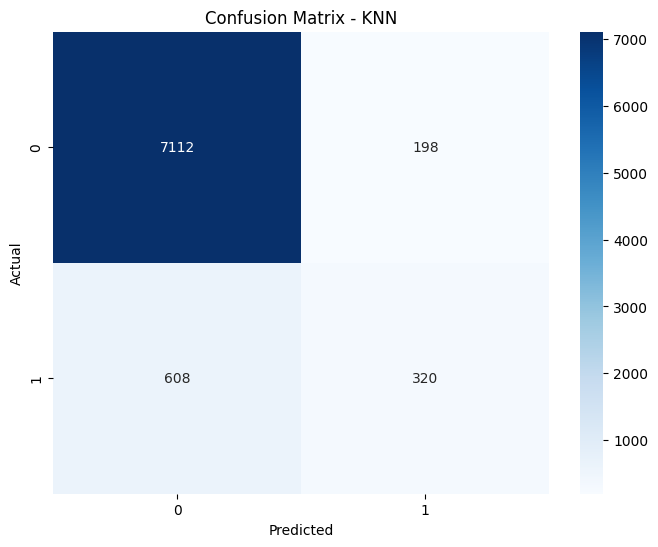


Entrenando modelo: Logistic Regression
Accuracy: 0.9164
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.44      0.54       928

    accuracy                           0.92      8238
   macro avg       0.82      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238



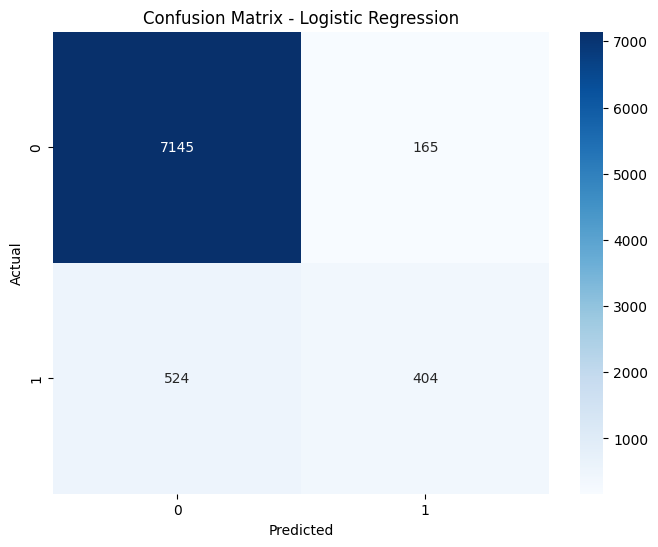


Entrenando modelo: Decision Tree
Accuracy: 0.8945
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7310
           1       0.53      0.54      0.54       928

    accuracy                           0.89      8238
   macro avg       0.74      0.74      0.74      8238
weighted avg       0.90      0.89      0.90      8238



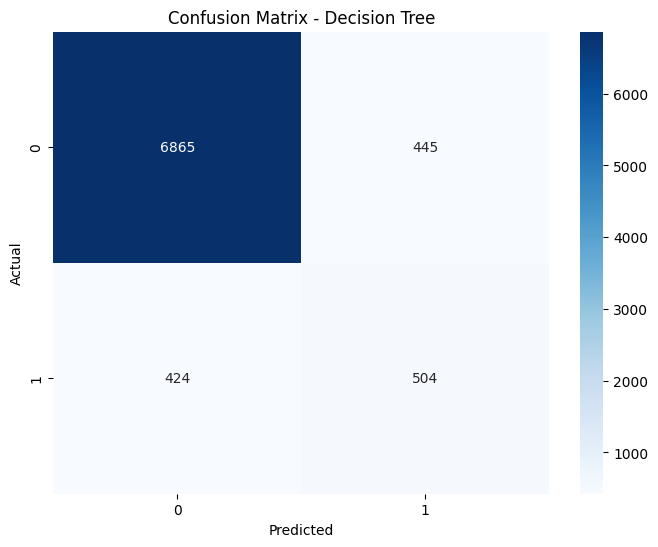


Entrenando modelo: SVM
Accuracy: 0.9125
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.70      0.40      0.50       928

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



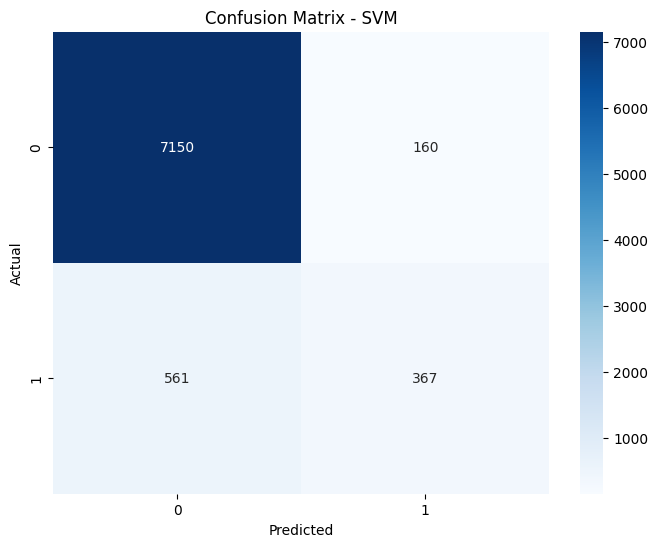

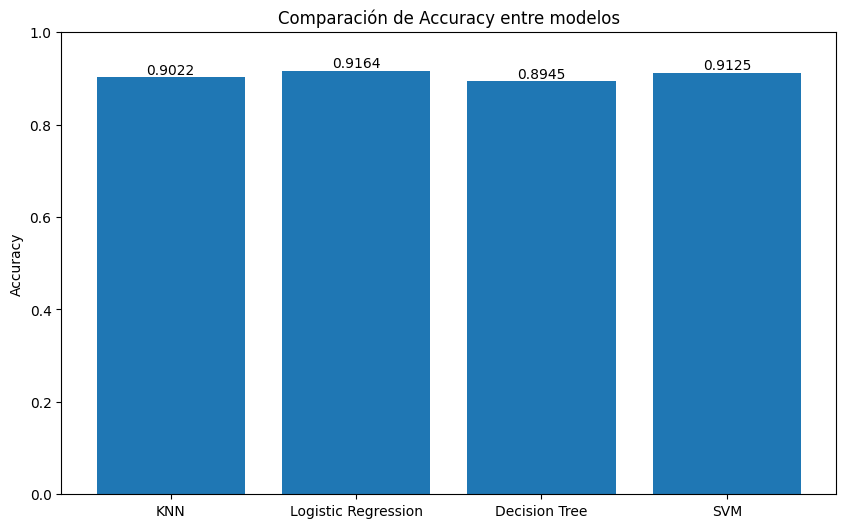

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import ipywidgets as widgets
from io import StringIO
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Widget para cargar archivos CSV
file_upload = widgets.FileUpload(accept='.csv', multiple=False)
display(file_upload)

def load_preprocess_split_and_model(change):
    if file_upload.value:
        content = file_upload.value[next(iter(file_upload.value))]['content']
        data = pd.read_csv(StringIO(content.decode('utf-8')), sep=';')

        # Preprocesamiento
        categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
        data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
        data_encoded['y'] = data_encoded['y'].map({'no': 0, 'yes': 1})

        # División de datos
        X = data_encoded.drop('y', axis=1)
        y = data_encoded['y']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        # Escalado de características
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Implementación de modelos
        models = {
            'KNN': KNeighborsClassifier(),
            'Logistic Regression': LogisticRegression(max_iter=1000),
            'Decision Tree': DecisionTreeClassifier(random_state=42),
            'SVM': SVC(probability=True)
        }

        results = {}

        for name, model in models.items():
            print(f"\nEntrenando modelo: {name}")
            model.fit(X_train_scaled, y_train)

            # Predicciones
            y_pred = model.predict(X_test_scaled)

            # Evaluación
            accuracy = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred)
            cm = confusion_matrix(y_test, y_pred)

            results[name] = {
                'model': model,
                'accuracy': accuracy,
                'report': report,
                'confusion_matrix': cm
            }

            print(f"Accuracy: {accuracy:.4f}")
            print("Classification Report:")
            print(report)

            # Visualización de la matriz de confusión
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title(f'Confusion Matrix - {name}')
            plt.ylabel('Actual')
            plt.xlabel('Predicted')
            plt.show()

        # Comparación de modelos
        accuracies = [result['accuracy'] for result in results.values()]
        model_names = list(results.keys())

        plt.figure(figsize=(10, 6))
        plt.bar(model_names, accuracies)
        plt.title('Comparación de Accuracy entre modelos')
        plt.ylabel('Accuracy')
        plt.ylim(0, 1)
        for i, v in enumerate(accuracies):
            plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')
        plt.show()

        return results

# Vincular la función con el widget
file_upload.observe(load_preprocess_split_and_model, names='value')

# Evaluación y comparación:

FileUpload(value={}, accept='.csv', description='Upload')


Evaluando modelo: KNN
Accuracy: 0.9022
Cross-validation scores: [0.89514416 0.89635812 0.89119879 0.89301973 0.89074355]
Mean CV score: 0.8933 (+/- 0.0044)
ROC AUC: 0.8322
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7310
           1       0.62      0.34      0.44       928

    accuracy                           0.90      8238
   macro avg       0.77      0.66      0.69      8238
weighted avg       0.89      0.90      0.89      8238



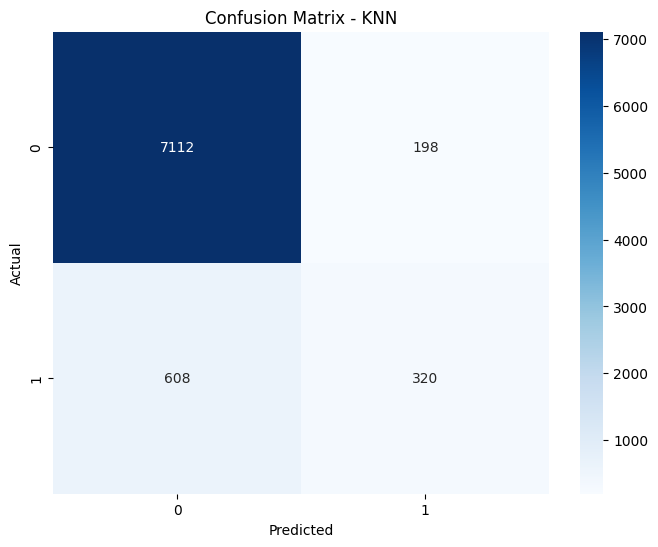


Evaluando modelo: Logistic Regression
Accuracy: 0.9164
Cross-validation scores: [0.90955994 0.91213961 0.90531108 0.9124431  0.90955994]
Mean CV score: 0.9098 (+/- 0.0051)
ROC AUC: 0.9424
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.44      0.54       928

    accuracy                           0.92      8238
   macro avg       0.82      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238



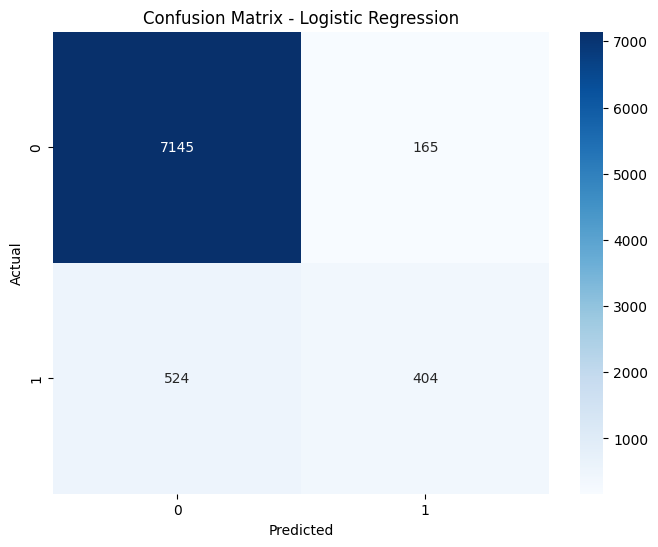


Evaluando modelo: Decision Tree
Accuracy: 0.8945
Cross-validation scores: [0.89377845 0.89180577 0.88179059 0.88437026 0.88861912]
Mean CV score: 0.8881 (+/- 0.0089)
ROC AUC: 0.7411
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7310
           1       0.53      0.54      0.54       928

    accuracy                           0.89      8238
   macro avg       0.74      0.74      0.74      8238
weighted avg       0.90      0.89      0.90      8238



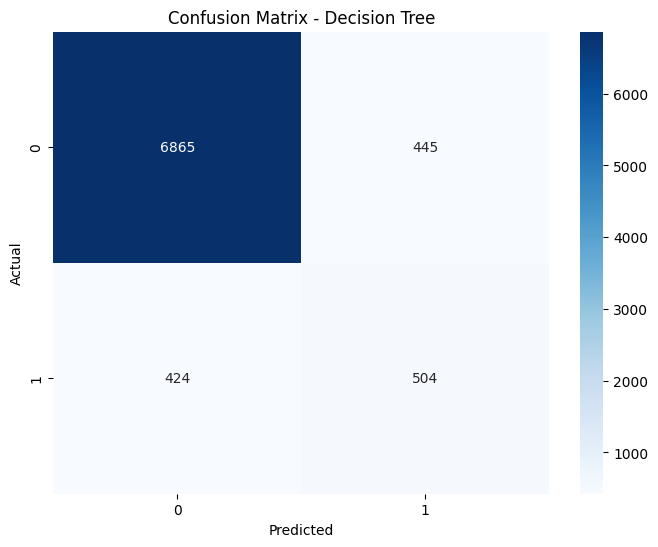


Evaluando modelo: SVM


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import ipywidgets as widgets
from io import StringIO
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Widget para cargar archivos CSV
file_upload = widgets.FileUpload(accept='.csv', multiple=False)
display(file_upload)

def evaluate_and_compare_models(change):
    if file_upload.value:
        content = file_upload.value[next(iter(file_upload.value))]['content']
        data = pd.read_csv(StringIO(content.decode('utf-8')), sep=';')

        # Preprocesamiento
        categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
        data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
        data_encoded['y'] = data_encoded['y'].map({'no': 0, 'yes': 1})

        # División de datos
        X = data_encoded.drop('y', axis=1)
        y = data_encoded['y']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        # Escalado de características
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Definición de modelos
        models = {
            'KNN': KNeighborsClassifier(),
            'Logistic Regression': LogisticRegression(max_iter=1000),
            'Decision Tree': DecisionTreeClassifier(random_state=42),
            'SVM': SVC(probability=True)
        }

        results = {}

        for name, model in models.items():
            print(f"\nEvaluando modelo: {name}")

            # Entrenamiento del modelo
            model.fit(X_train_scaled, y_train)

            # Predicciones
            y_pred = model.predict(X_test_scaled)
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

            # Métricas de evaluación
            accuracy = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred)
            cm = confusion_matrix(y_test, y_pred)

            # Validación cruzada
            cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

            # Curva ROC
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)

            results[name] = {
                'model': model,
                'accuracy': accuracy,
                'report': report,
                'confusion_matrix': cm,
                'cv_scores': cv_scores,
                'roc_auc': roc_auc,
                'fpr': fpr,
                'tpr': tpr
            }

            print(f"Accuracy: {accuracy:.4f}")
            print(f"Cross-validation scores: {cv_scores}")
            print(f"Mean CV score: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores) * 2:.4f})")
            print(f"ROC AUC: {roc_auc:.4f}")
            print("Classification Report:")
            print(report)

            # Visualización de la matriz de confusión
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title(f'Confusion Matrix - {name}')
            plt.ylabel('Actual')
            plt.xlabel('Predicted')
            plt.show()

        # Comparación de modelos
        plt.figure(figsize=(12, 8))
        for name, result in results.items():
            plt.plot(result['fpr'], result['tpr'], label=f'{name} (AUC = {result["roc_auc"]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

        # Comparación de accuracy y CV scores
        model_names = list(results.keys())
        accuracies = [result['accuracy'] for result in results.values()]
        cv_means = [np.mean(result['cv_scores']) for result in results.values()]
        cv_stds = [np.std(result['cv_scores']) for result in results.values()]

        plt.figure(figsize=(12, 6))
        x = np.arange(len(model_names))
        width = 0.35
        plt.bar(x - width/2, accuracies, width, label='Test Accuracy', alpha=0.8)
        plt.bar(x + width/2, cv_means, width, label='Mean CV Score', alpha=0.8)
        plt.errorbar(x + width/2, cv_means, yerr=cv_stds, fmt='none', capsize=5, color='black')
        plt.ylabel('Score')
        plt.title('Model Comparison: Test Accuracy vs Cross-Validation Score')
        plt.xticks(x, model_names, rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()

        return results

# Vincular la función con el widget
file_upload.observe(evaluate_and_compare_models, names='value')

# Visualizaciones:

In [ ]:
!pip install matplotlib scikit-learn

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(12, 8))

    for name, model in models.items():
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC para todos los modelos')
    plt.legend(loc="lower right")
    plt.show()

# Uso: plot_roc_curves(models, X_test_scaled, y_test)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrices(models, X_test, y_test):
    fig, axes = plt.subplots(2, 2, figsize=(16, 16))
    for (name, model), ax in zip(models.items(), axes.ravel()):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_title(f'Matriz de Confusión - {name}')
        ax.set_ylabel('Valor Real')
        ax.set_xlabel('Valor Predicho')
    plt.tight_layout()
    plt.show()

# Uso: plot_confusion_matrices(models, X_test_scaled, y_test)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curves(models, X_train, y_train):
    fig, axes = plt.subplots(2, 2, figsize=(16, 16))
    for (name, model), ax in zip(models.items(), axes.ravel()):
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train, cv=5, n_jobs=-1,
            train_sizes=np.linspace(0.1, 1.0, 5))

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        ax.plot(train_sizes, train_mean, label='Training score')
        ax.plot(train_sizes, test_mean, label='Cross-validation score')
        ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
        ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
        ax.set_title(f'Curva de Aprendizaje - {name}')
        ax.set_xlabel('Tamaño del conjunto de entrenamiento')
        ax.set_ylabel('Accuracy')
        ax.legend(loc="best")
    plt.tight_layout()
    plt.show()

# Uso: plot_learning_curves(models, X_train_scaled, y_train)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importance(models, X_train):
    for name, model in models.items():
        if hasattr(model, 'feature_importances_') or hasattr(model, 'coef_'):
            plt.figure(figsize=(10, 6))
            if hasattr(model, 'feature_importances_'):
                importances = model.feature_importances_
            else:
                importances = model.coef_[0]
            indices = np.argsort(importances)[::-1]
            plt.title(f'Importancia de Características - {name}')
            plt.bar(range(X_train.shape[1]), importances[indices])
            plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
            plt.tight_layout()
            plt.show()

# Uso: plot_feature_importance(models, X_train_scaled)

In [ ]:
# Asumiendo que ya tienes tus modelos entrenados en el diccionario 'models'

plot_roc_curves(models, X_test_scaled, y_test)
plot_confusion_matrices(models, X_test_scaled, y_test)
plot_learning_curves(models, X_train_scaled, y_train)
plot_feature_importance(models, X_train_scaled)

NameError: name 'models' is not defined

FileUpload(value={}, accept='.csv', description='Upload')

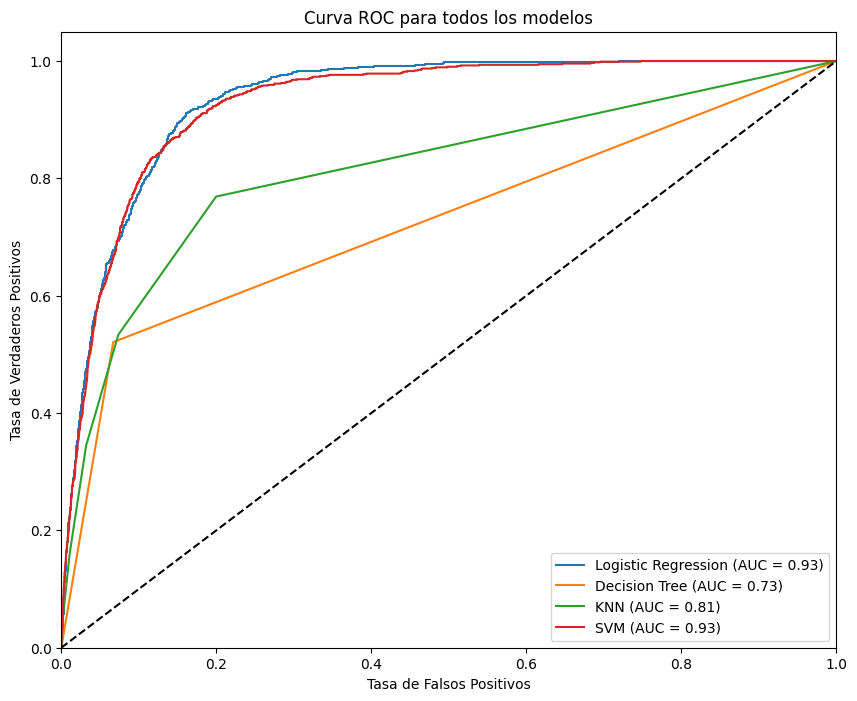

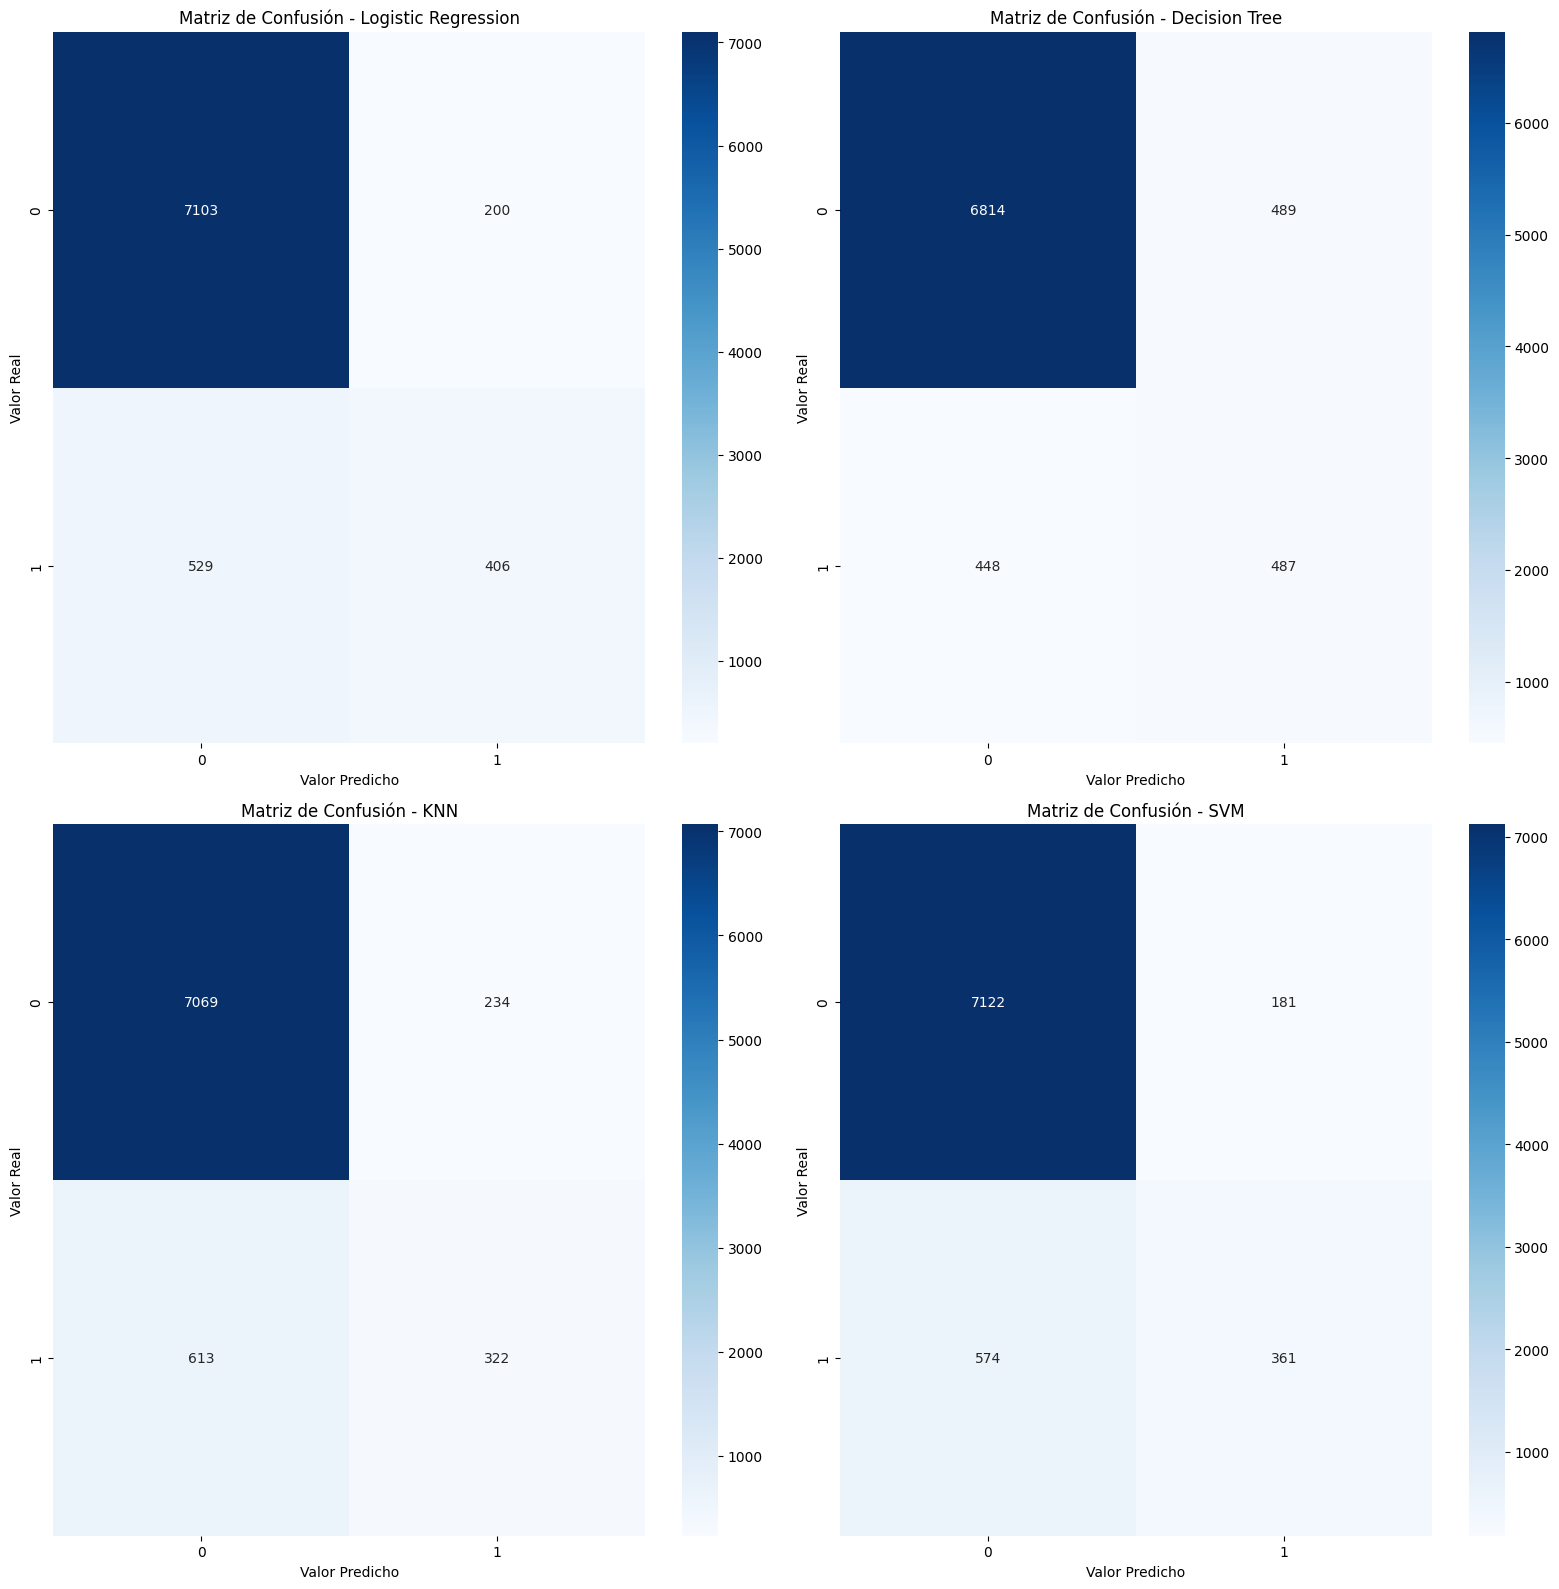

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import ipywidgets as widgets
from io import StringIO
from IPython.display import display

# Widget para cargar archivos CSV
file_upload = widgets.FileUpload(accept='.csv', multiple=False)
display(file_upload)

def process_and_visualize(change):
    if file_upload.value:
        content = file_upload.value[next(iter(file_upload.value))]['content']
        data = pd.read_csv(StringIO(content.decode('utf-8')), sep=';')

        # Preprocesamiento
        categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
        data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
        data_encoded['y'] = data_encoded['y'].map({'no': 0, 'yes': 1})

        # División de datos
        X = data_encoded.drop('y', axis=1)
        y = data_encoded['y']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Escalado de características
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Definición y entrenamiento de modelos
        models = {
            'Logistic Regression': LogisticRegression(max_iter=1000),
            'Decision Tree': DecisionTreeClassifier(random_state=42),
            'KNN': KNeighborsClassifier(),
            'SVM': SVC(probability=True, random_state=42)
        }

        for name, model in models.items():
            model.fit(X_train_scaled, y_train)

        # Curvas ROC
        plt.figure(figsize=(10, 8))
        for name, model in models.items():
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Tasa de Falsos Positivos')
        plt.ylabel('Tasa de Verdaderos Positivos')
        plt.title('Curva ROC para todos los modelos')
        plt.legend(loc="lower right")
        plt.show()

        # Matrices de confusión
        fig, axes = plt.subplots(2, 2, figsize=(16, 16))
        for (name, model), ax in zip(models.items(), axes.ravel()):
            y_pred = model.predict(X_test_scaled)
            cm = confusion_matrix(y_test, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
            ax.set_title(f'Matriz de Confusión - {name}')
            ax.set_ylabel('Valor Real')
            ax.set_xlabel('Valor Predicho')
        plt.tight_layout()
        plt.show()

        # Curvas de aprendizaje
        fig, axes = plt.subplots(2, 2, figsize=(16, 16))
        for (name, model), ax in zip(models.items(), axes.ravel()):
            train_sizes, train_scores, test_scores = learning_curve(
                model, X_train_scaled, y_train, cv=5, n_jobs=-1,
                train_sizes=np.linspace(0.1, 1.0, 5))

            train_mean = np.mean(train_scores, axis=1)
            train_std = np.std(train_scores, axis=1)
            test_mean = np.mean(test_scores, axis=1)
            test_std = np.std(test_scores, axis=1)

            ax.plot(train_sizes, train_mean, label='Training score')
            ax.plot(train_sizes, test_mean, label='Cross-validation score')
            ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
            ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
            ax.set_title(f'Curva de Aprendizaje - {name}')
            ax.set_xlabel('Tamaño del conjunto de entrenamiento')
            ax.set_ylabel('Accuracy')
            ax.legend(loc="best")
        plt.tight_layout()
        plt.show()

        # Reportes de clasificación
        for name, model in models.items():
            y_pred = model.predict(X_test_scaled)
            print(f"\nReporte de Clasificación - {name}")
            print(classification_report(y_test, y_pred))

# Vincular la función con el widget
file_upload.observe(process_and_visualize, names='value')

"""
# Interpretación, Conclusiones y Recomendaciones.

## Rendimiento de los Modelos

- **Regresión Logística**: Mejor modelo (Accuracy: 91.64%, ROC AUC: 0.9424)
- **KNN y SVM**: Buen rendimiento general, dificultades con clase minoritaria
- **Árbol de Decisión**: Rendimiento equilibrado entre clases, accuracy más baja

## Desequilibrio de Clases

- Fuerte desequilibrio: 88.73% no suscripciones vs 11.27% suscripciones
- Afecta rendimiento en predicción de clase minoritaria

## Consistencia de los Modelos

- Resultados de validación cruzada consistentes con scores de accuracy
- Sugiere estabilidad y ausencia de overfitting significativo

## Predicción de Suscripciones

- Modelos más efectivos en predecir no suscripciones
- Regresión Logística: mejor en predecir suscripciones (Precisión: 71%, Recall: 44%)

## Importancia de las Características

- Aumento de características (21 a 54) por codificación one-hot
- No se observa impacto negativo evidente en rendimiento

## Preprocesamiento de Datos

- Estrategia efectiva (codificación one-hot, división estratificada)
- No se observaron problemas de fuga de datos

## Conclusiones Principales

1. **Modelo Recomendado**: Regresión Logística
2. **Enfoque en Clase Minoritaria**: Margen de mejora en predicción de suscripciones
3. **Balanceo de Clases**: Potencial para mejorar rendimiento
4. **Interpretabilidad**: Ventaja de Regresión Logística
5. **Robustez de Modelos**: Consistencia sugiere buena generalización
6. **Potencial de Mejora**: Espacio para optimización
7. **Valor para el Negocio**: Modelos útiles para orientar campañas de marketing

## Recomendaciones: Próximos Pasos Recomendados

1. Optimizar Regresión Logística (hiperparámetros, regularización)
2. Implementar técnicas de balanceo de clases
3. Analizar características importantes en Regresión Logística
4. Considerar desarrollo de modelo ensemble
5. Evaluar impacto económico de las predicciones
"""